In [69]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
data_pizza = pd.read_csv('session1-pizza - pizza_sales.csv')
data_pizza

,order_details_id,order_id,pizza_id,quantity,order_date,Per month,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1.0,hawaiian_m,1,01/01/2015,NaN,11:38:36,"13,25","13,25",M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2.0,classic_dlx_m,1,01/01/2015,NaN,11:57:40,16,16,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2.0,five_cheese_l,1,01/01/2015,NaN,11:57:40,"18,5","18,5",L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2.0,ital_supr_l,1,01/01/2015,NaN,11:57:40,"20,75","20,75",L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2.0,mexicana_m,1,01/01/2015,NaN,11:57:40,16,16,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48616,48617,21348.0,four_cheese_l,1,31/12/2015,NaN,21:23:10,"17,95","17,95",L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348.0,napolitana_s,1,31/12/2015,NaN,21:23:10,12,12,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349.0,mexicana_l,1,31/12/2015,NaN,22:09:54,"20,25","20,25",L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350.0,bbq_ckn_s,1,31/12/2015,NaN,23:02:05,"12,75","12,75",S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [70]:
data_pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48621 entries, 0 to 48620
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48621 non-null  object 
 1   order_id           48620 non-null  float64
 2   pizza_id           48620 non-null  object 
 3   quantity           48621 non-null  int64  
 4   order_date         48620 non-null  object 
 5   Per month          0 non-null      float64
 6   order_time         48620 non-null  object 
 7   unit_price         48620 non-null  object 
 8   total_price        48621 non-null  object 
 9   pizza_size         48620 non-null  object 
 10  pizza_category     48620 non-null  object 
 11  pizza_ingredients  48620 non-null  object 
 12  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 4.8+ MB


In [71]:
data_pizza = data_pizza.drop(data_pizza.columns[5], axis= 1)

In [72]:
data_pizza['unit_price'] = data_pizza.unit_price.replace(',' , '.', regex=True).astype('float')
data_pizza['total_price'] = data_pizza.total_price.str.replace('[^\d.,]', '', regex=True)
data_pizza['total_price'] = data_pizza.total_price.replace(',' , '.', regex=True).astype('float')
data_pizza['order_date'] =  pd.to_datetime(data_pizza['order_date'], format= "%d/%m/%Y")

data_pizza.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1.0,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2.0,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2.0,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2.0,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2.0,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [73]:
data_pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48621 entries, 0 to 48620
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48621 non-null  object        
 1   order_id           48620 non-null  float64       
 2   pizza_id           48620 non-null  object        
 3   quantity           48621 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48621 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 4.5+ MB


In [74]:
data_pizza['pizza_size'].value_counts()

pizza_size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64

In [75]:
unique_values = data_pizza['pizza_size'].unique()

dict_pizza_size = {valor: i for i, valor in enumerate(unique_values)}

#del dict_pizza_size[5]

dict_pizza_size

{'M': 0, 'L': 1, 'S': 2, 'XL': 3, 'XXL': 4, nan: 5}

In [76]:
data_pizza['pizza_size'] = data_pizza['pizza_size'].map(dict_pizza_size)

data_pizza

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1.0,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,0,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2.0,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,0,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2.0,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,1,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2.0,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,1,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2.0,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,0,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48616,48617,21348.0,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,1,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348.0,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,2,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349.0,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,1,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350.0,bbq_ckn_s,1,2015-12-31,23:02:05,12.75,12.75,2,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


Serie de tiempo de ventas por dia, analizar por cada trimestre, escoja las mejore y peores semanas en venta para realizar un analisis por horas.

In [77]:
data01 = data_pizza[['order_date', 'order_time', 'unit_price', 'total_price']]


In [78]:
data01['mes'] = data01.order_date.dt.strftime('%Y-%m')

# Calcular las ventas totales por mes
ventas_por_mes = data01.groupby('mes')['total_price'].sum()

/tmp/ipykernel_3075/2961667515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data01['mes'] = data01.order_date.dt.strftime('%Y-%m')


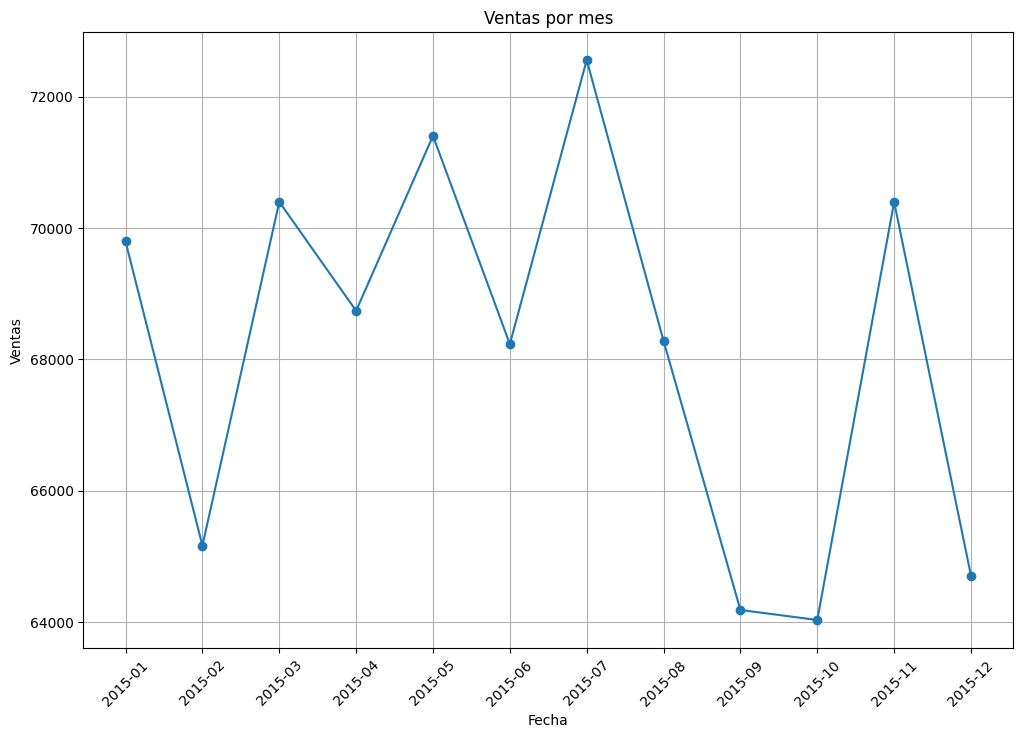

In [79]:
plt.figure(figsize=(12, 8))
plt.plot(ventas_por_mes.index, ventas_por_mes.values, marker = 'o' )
plt.xticks(rotation= 45)
plt.title('Ventas por mes')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

In [80]:
trimestre_01 = data01.query('order_date.dt.quarter == 1')
trimestre_01.describe()


,order_date,unit_price,total_price
count,12234,12234.000000,12234.000000
mean,2015-02-14 11:01:44.168710144,16.489954,16.785189
min,2015-01-01 00:00:00,9.750000,9.750000
25%,2015-01-23 00:00:00,12.750000,12.750000
50%,2015-02-14 00:00:00,16.500000,16.500000
75%,2015-03-09 00:00:00,20.250000,20.500000
max,2015-03-31 00:00:00,35.950000,62.250000
std,NaN,3.636609,4.350841


In [81]:
#from matplotlib.dates import MonthLocator, DateFormatter

ventas_por_trimestre = data01['order_date'].dt.to_period('Q')
ventas_por_trimestre = data01.groupby('Trimestre')['total_price'].sum()

ventas_por_trimestre.index = ventas_por_trimestre.index.to_timestamp()
plt.figure(figsize=(12, 8))
plt.plot(ventas_por_trimestre.index, ventas_por_trimestre.values, marker = 'o' )
plt.xticks(rotation =45)
plt.title('Ventas Trimestrales de pizza')
plt.xlabel('Fecha')
plt.ylabel('Ventas')

plt.xticks(ventas_por_trimestre.index, [fecha.strftime('%b %Y') for fecha in ventas_por_trimestre.index], rotation=45)


plt.grid(True)


plt.show()

KeyError: 'Trimestre'

Crear un histograma del tipo de pizza vendido por cada mes,asi como su comparativo mes a mes.

In [ ]:
data_pizza.pizza_category.value_counts()

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

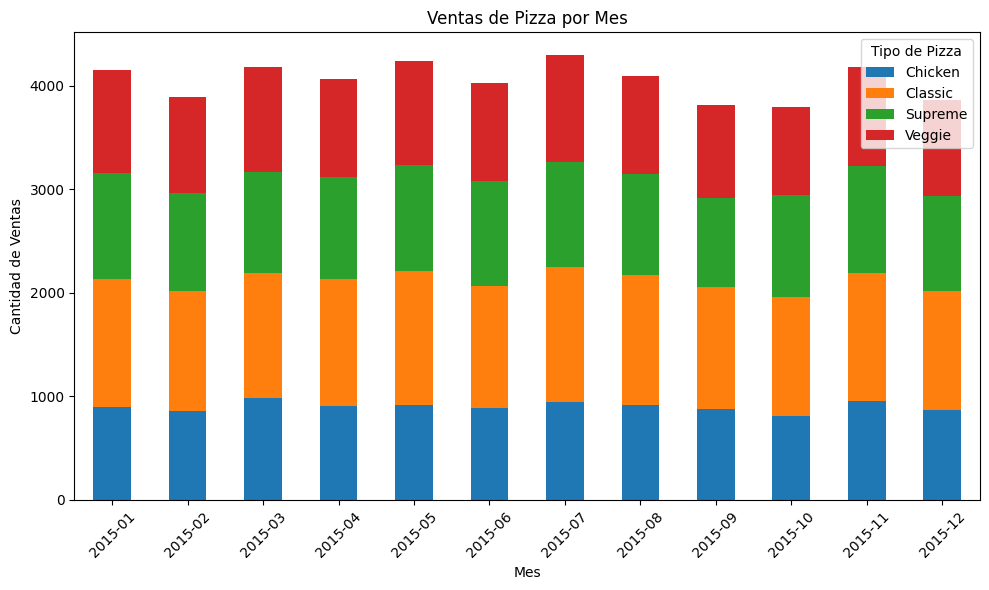

In [ ]:


data_pizza['mes'] = data_pizza['order_date'].dt.strftime('%Y-%m')

ventas_por_mes = data_pizza.groupby(['mes', 'pizza_category']).size().unstack(fill_value=0)

ventas_por_mes.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Ventas de Pizza por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Pizza')
plt.tight_layout()
plt.show()

In [ ]:
ventas_por_mes = data_pizza.groupby(['mes', 'pizza_category']).size().unstack(fill_value=0)
ventas_por_mes

pizza_category,Chicken,Classic,Supreme,Veggie
mes,,,,
2015-01,894,1238,1026,998
2015-02,859,1158,948,927
2015-03,981,1211,971,1023
2015-04,903,1230,989,945
2015-05,919,1293,1024,1003
2015-06,887,1177,1021,940
2015-07,942,1305,1021,1033
2015-08,916,1256,974,948
2015-09,881,1174,865,899


Crear una nube de palabras basado en los ingredientes mas usados, elimine conectores entre palabras. 

In [ ]:
ingredient_concat = data_pizza['pizza_ingredients'].drop(index= 48620)
ingredient_concat = ','.join(ingredient_concat).split(',')


ingredient_count = pd.Series(ingredient_concat).value_counts()
ingredient_count

 Garlic                27422
 Tomatoes              23694
 Red Onions            19547
 Red Peppers           16284
Chicken                 8443
                       ...  
Brie Carre Cheese        480
 Prosciutto              480
 Caramelized Onions      480
 Pears                   480
 Thyme                   480
Name: count, Length: 73, dtype: int64

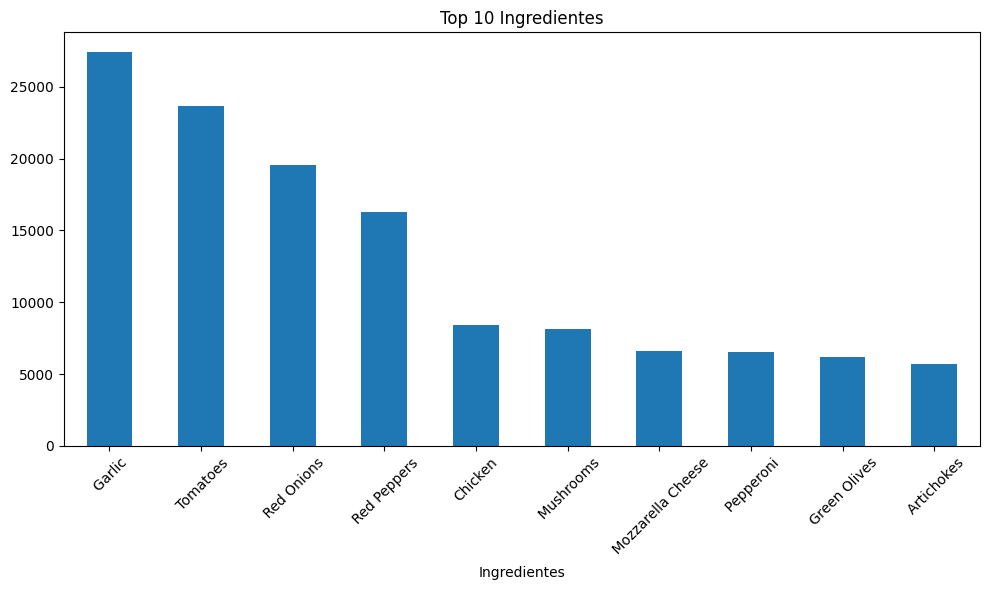

In [ ]:


ingredient_count.head(10).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top 10 Ingredientes')
plt.xlabel('Ingredientes')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()